In [340]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

Build the Avg_Salary_By_Discipline table

In [261]:
!cat 2015Avg.txt










Humanities $45,042 58

In [291]:
#extract category names as dictionary keys

def parse_avg_salary_data(filename):
    '''

    DO THE DOCSTRING

    '''
    avg_lst = []
    avg_dict = {}
    avg_dict['Year'] = filename[:4]
    regpat = '^[0-9]+,[0-9]+'

    with open(filename, 'r') as f:
        lines = f.readlines()
        for line in lines: 
            avg_lst.append(line.split('$'))

    for i in range (1,len(avg_lst)):
        salary = avg_lst[i][1]
        salary = int(re.search(regpat,salary).group(0).replace(',',''))
        avg_dict[avg_lst[i][0].strip().upper().replace(' ','_')] = salary    
    
    return avg_dict

In [292]:
#generate a list of file names
#call function above to return a dictionary for each, then append values
def get_avg_salary_data(years):
    '''
    
    DO THE DOCSTRING
    
    '''
    avg_salary_by_cat = {}

    #calls function to parse salary data for years provided
    for year in years:
        filename = year+'Avg.txt'
        temp_dict = parse_avg_salary_data(filename)

        #generates master dictionary
        for key, value in temp_dict.items():
            if key not in avg_salary_by_cat:
                avg_salary_by_cat[key] = [value]
            else:
                avg_salary_by_cat[key].append(value)

    #eliminates keys (categories) with insufficient reporting data
    keys_to_remove = []
    for key,value in avg_salary_by_cat.items():
        if len(value) < 8: keys_to_remove.append(key)
    for keys in keys_to_remove:
        avg_salary_by_cat.pop(keys)
        


    return avg_salary_by_cat


In [315]:
#call the function to generate table of average salaries for each main reporting category

years = ['2015','2016','2017','2018','2019','2020','2021','2022']
avg_salary_by_cat = get_avg_salary_data(years)

col_years = avg_salary_by_cat.pop('Yeabr')
for i in range(len(col_years)):
    col_years[i] += '_avg_sal'
col_years.insert(0,'Category')
    
avg_salary_cat = pd.DataFrame(avg_salary_by_cat).T.reset_index()
avg_salary_cat.columns=col_years
avg_salary_cat

,Category,2015_avg_sal,2016_avg_sal,2017_avg_sal,2018_avg_sal,2019_avg_sal,2020_avg_sal,2021_avg_sal,2022_avg_sal
0,ENGINEERING,62998,64891,66097,66521,69188,69961,71088,73922
1,COMPUTER_SCIENCE,61287,61321,65540,66005,67539,67411,72173,75900
2,MATH_&_SCIENCES,56171,55087,59368,61867,62177,62488,63316,66760
3,BUSINESS,51508,52236,54803,56720,57657,57939,58869,60695
4,AGRICULTURE_&_NATURAL_RESOURCES,51220,48729,54364,53565,55750,53504,54857,57807
5,COMMUNICATIONS,49395,47047,51925,51448,52056,56484,58174,55455
6,SOCIAL_SCIENCES,49047,46585,53459,56689,57310,57425,59919,61173
7,HUMANITIES,45042,46065,48733,56688,56651,53617,59500,50681


In [332]:
degrees_by_cat = pd.read_csv('Degrees_By_Cat.csv')
degrees_by_cat.Category=degrees_by_cat.Category.apply(lambda x: x.upper())
degrees_by_cat

,Category,2015_degrees,2016_degrees,2017_degrees,2018_degrees,2019_degrees,2020_degrees,2021_degrees,2022_degrees,2015_rel_pop,2016_rel_pop,2017_rel_pop,2018_rel_pop,2019_rel_pop,2020_rel_pop,2021_rel_pop,2022_rel_pop
0,AGRICULTURE_&_NATURAL_RESOURCES,36278,36995,37734,39317,40458,NaN,NaN,NaN,0.019,0.019,0.019,0.020,0.020,NaN,NaN,NaN
1,BUSINESS,363741,371690,381109,386240,390564,NaN,NaN,NaN,0.192,0.194,0.195,0.195,0.194,NaN,NaN,NaN
2,COMMUNICATIONS,95793,97375,98409,96520,96972,NaN,NaN,NaN,0.051,0.051,0.050,0.049,0.048,NaN,NaN,NaN
3,COMPUTER_SCIENCE,59586,64402,71416,79597,88633,NaN,NaN,NaN,0.031,0.034,0.037,0.040,0.044,NaN,NaN,NaN
4,ENGINEERING,97852,106789,115671,121953,126687,NaN,NaN,NaN,0.052,0.056,0.059,0.062,0.063,NaN,NaN,NaN
5,HUMANITIES,223687,215876,211782,207048,207218,NaN,NaN,NaN,0.118,0.112,0.108,0.105,0.103,NaN,NaN,NaN
6,SOCIAL_SCIENCES,343492,338480,336497,336392,336303,NaN,NaN,NaN,0.181,0.176,0.172,0.170,0.167,NaN,NaN,NaN
7,MATH_&_SCIENCES,170890,175880,180694,183920,187291,NaN,NaN,NaN,0.090,0.092,0.092,0.093,0.093,NaN,NaN,NaN


In [357]:
data = pd.merge(avg_salary_cat,degrees_by_cat, on='Category')
data

,Category,2015_avg_sal,2016_avg_sal,2017_avg_sal,2018_avg_sal,2019_avg_sal,2020_avg_sal,2021_avg_sal,2022_avg_sal,2015_degrees,...,2021_degrees,2022_degrees,2015_rel_pop,2016_rel_pop,2017_rel_pop,2018_rel_pop,2019_rel_pop,2020_rel_pop,2021_rel_pop,2022_rel_pop
0,ENGINEERING,62998,64891,66097,66521,69188,69961,71088,73922,97852,...,NaN,NaN,0.052,0.056,0.059,0.062,0.063,NaN,NaN,NaN
1,COMPUTER_SCIENCE,61287,61321,65540,66005,67539,67411,72173,75900,59586,...,NaN,NaN,0.031,0.034,0.037,0.040,0.044,NaN,NaN,NaN
2,MATH_&_SCIENCES,56171,55087,59368,61867,62177,62488,63316,66760,170890,...,NaN,NaN,0.090,0.092,0.092,0.093,0.093,NaN,NaN,NaN
3,BUSINESS,51508,52236,54803,56720,57657,57939,58869,60695,363741,...,NaN,NaN,0.192,0.194,0.195,0.195,0.194,NaN,NaN,NaN
4,AGRICULTURE_&_NATURAL_RESOURCES,51220,48729,54364,53565,55750,53504,54857,57807,36278,...,NaN,NaN,0.019,0.019,0.019,0.020,0.020,NaN,NaN,NaN
5,COMMUNICATIONS,49395,47047,51925,51448,52056,56484,58174,55455,95793,...,NaN,NaN,0.051,0.051,0.050,0.049,0.048,NaN,NaN,NaN
6,SOCIAL_SCIENCES,49047,46585,53459,56689,57310,57425,59919,61173,343492,...,NaN,NaN,0.181,0.176,0.172,0.170,0.167,NaN,NaN,NaN
7,HUMANITIES,45042,46065,48733,56688,56651,53617,59500,50681,223687,...,NaN,NaN,0.118,0.112,0.108,0.105,0.103,NaN,NaN,NaN


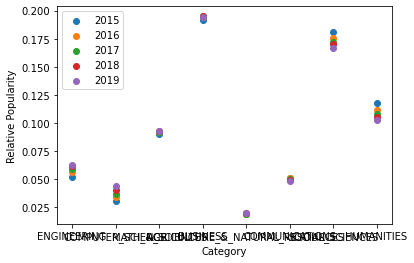

In [358]:
plt.scatter(x=data['Category'],y=data['2015_rel_pop'])
plt.scatter(x=data['Category'],y=data['2016_rel_pop'])
plt.scatter(x=data['Category'],y=data['2017_rel_pop'])
plt.scatter(x=data['Category'],y=data['2018_rel_pop'])
plt.scatter(x=data['Category'],y=data['2019_rel_pop'])
plt.xlabel('Category')
plt.ylabel('Relative Popularity')
plt.legend(['2015','2016','2017','2018','2019'],loc=0)

In [393]:
data2 = data.T
data2

,0,1,2,3,4,5,6,7
Category,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
2015_avg_sal,62998,61287,56171,51508,51220,49395,49047,45042
2016_avg_sal,64891,61321,55087,52236,48729,47047,46585,46065
2017_avg_sal,66097,65540,59368,54803,54364,51925,53459,48733
2018_avg_sal,66521,66005,61867,56720,53565,51448,56689,56688
2019_avg_sal,69188,67539,62177,57657,55750,52056,57310,56651
2020_avg_sal,69961,67411,62488,57939,53504,56484,57425,53617
2021_avg_sal,71088,72173,63316,58869,54857,58174,59919,59500
2022_avg_sal,73922,75900,66760,60695,57807,55455,61173,50681
2015_degrees,97852,59586,170890,363741,36278,95793,343492,223687


In [399]:
categories = data2.iloc[0]
categories

0                        ENGINEERING
1                   COMPUTER_SCIENCE
2                    MATH_&_SCIENCES
3                           BUSINESS
4    AGRICULTURE_&_NATURAL_RESOURCES
5                     COMMUNICATIONS
6                    SOCIAL_SCIENCES
7                         HUMANITIES
Name: Category, dtype: object

In [417]:
data3 = data2.iloc[1:]
data3

,0,1,2,3,4,5,6,7
2015_avg_sal,62998,61287,56171,51508,51220,49395,49047,45042
2016_avg_sal,64891,61321,55087,52236,48729,47047,46585,46065
2017_avg_sal,66097,65540,59368,54803,54364,51925,53459,48733
2018_avg_sal,66521,66005,61867,56720,53565,51448,56689,56688
2019_avg_sal,69188,67539,62177,57657,55750,52056,57310,56651
2020_avg_sal,69961,67411,62488,57939,53504,56484,57425,53617
2021_avg_sal,71088,72173,63316,58869,54857,58174,59919,59500
2022_avg_sal,73922,75900,66760,60695,57807,55455,61173,50681
2015_degrees,97852,59586,170890,363741,36278,95793,343492,223687
2016_degrees,106789,64402,175880,371690,36995,97375,338480,215876


In [418]:
data3.columns = categories
data3 = data3.reset_index()
data3

Category,index,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
0,2015_avg_sal,62998,61287,56171,51508,51220,49395,49047,45042
1,2016_avg_sal,64891,61321,55087,52236,48729,47047,46585,46065
2,2017_avg_sal,66097,65540,59368,54803,54364,51925,53459,48733
3,2018_avg_sal,66521,66005,61867,56720,53565,51448,56689,56688
4,2019_avg_sal,69188,67539,62177,57657,55750,52056,57310,56651
5,2020_avg_sal,69961,67411,62488,57939,53504,56484,57425,53617
6,2021_avg_sal,71088,72173,63316,58869,54857,58174,59919,59500
7,2022_avg_sal,73922,75900,66760,60695,57807,55455,61173,50681
8,2015_degrees,97852,59586,170890,363741,36278,95793,343492,223687
9,2016_degrees,106789,64402,175880,371690,36995,97375,338480,215876


In [424]:
data4 = data3.iloc[16:21]
data4

Category,index,ENGINEERING,COMPUTER_SCIENCE,MATH_&_SCIENCES,BUSINESS,AGRICULTURE_&_NATURAL_RESOURCES,COMMUNICATIONS,SOCIAL_SCIENCES,HUMANITIES
16,2015_rel_pop,0.052,0.031,0.09,0.192,0.019,0.051,0.181,0.118
17,2016_rel_pop,0.056,0.034,0.092,0.194,0.019,0.051,0.176,0.112
18,2017_rel_pop,0.059,0.037,0.092,0.195,0.019,0.05,0.172,0.108
19,2018_rel_pop,0.062,0.04,0.093,0.195,0.02,0.049,0.17,0.105
20,2019_rel_pop,0.063,0.044,0.093,0.194,0.02,0.048,0.167,0.103


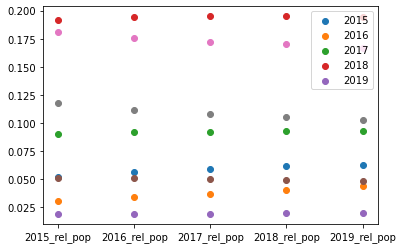

In [436]:
plt.scatter(y=data4['ENGINEERING'],x=data4['index'])
plt.scatter(y=data4['COMPUTER_SCIENCE'],x=data4['index'])
plt.scatter(y=data4['MATH_&_SCIENCES'],x=data4['index'])
plt.scatter(y=data4['BUSINESS'],x=data4['index'])
plt.scatter(y=data4['AGRICULTURE_&_NATURAL_RESOURCES'],x=data4['index'])
plt.scatter(y=data4['COMMUNICATIONS'],x=data4['index'])
plt.scatter(y=data4['SOCIAL_SCIENCES'],x=data4['index'])
plt.scatter(y=data4['HUMANITIES'],x=data4['index'])
#plt.xlabel('Category')
#plt.ylabel('Relative Popularity')
plt.legend(['2015','2016','2017','2018','2019'],loc=0)


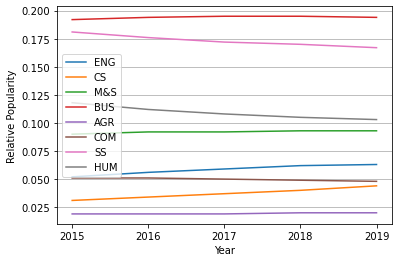

In [452]:
xvalues=range(5)
ax = plt.subplot(1,1,1)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,data4['ENGINEERING'])
plt.plot(xvalues,data4['COMPUTER_SCIENCE'])
plt.plot(xvalues,data4['MATH_&_SCIENCES'])
plt.plot(xvalues,data4['BUSINESS'])
plt.plot(xvalues,data4['AGRICULTURE_&_NATURAL_RESOURCES'])
plt.plot(xvalues,data4['COMMUNICATIONS'])
plt.plot(xvalues,data4['SOCIAL_SCIENCES'])
plt.plot(xvalues,data4['HUMANITIES'])
plt.legend(['ENG','CS','M&S','BUS','AGR','COM','SS','HUM'],loc=0)
plt.xlabel('Year')
plt.ylabel('Relative Popularity')
plt.grid(b=True, which='major',axis='y')



#next plot projected salaries over same time period
#determine if there is mathematical calulation for significance

In [ ]:
#